In [2]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# 1. ADATVIZUALIZÁCIÓ

In [4]:
# Adatbázis csatlakozás
connection = sqlite3.connect("C:/Users/Zen/Desktop/Egyetem/Szakdolgozat/Data/podcasts.db")

# Táblák
categories = pd.read_sql("select * from categories", connection) # Categories
podcasts = pd.read_sql("select * from podcasts", connection) # Podcasts
reviews = pd.read_sql("select * from reviews", connection) # Reviews
runs = pd.read_sql("select * from runs", connection) # Runs

In [4]:
# 1.1. CATEGORIES
# Megmutatja, hogy egy adott Podcast csatorna milyen kategóriákban oszt meg tartalmat.

categories.info()
categories.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70945 entries, 0 to 70944
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   podcast_id  70945 non-null  object
 1   category    70945 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


,podcast_id,category
0,c61aa81c9b929a66f0c1db6cbe5d8548,arts
1,c61aa81c9b929a66f0c1db6cbe5d8548,arts-performing-arts
2,c61aa81c9b929a66f0c1db6cbe5d8548,music
3,ad4f2bf69c72b8db75978423c25f379e,arts
4,ad4f2bf69c72b8db75978423c25f379e,arts-design


In [5]:
# Tisztítás

categories.isnull().sum()

podcast_id    0
category      0
dtype: int64

In [30]:
# Vizualizáció

# Hány féle kategória létezik?
first = pd.read_sql("select distinct category from categories",connection)
first

# Egy adott csatorna, milyen kategóriákban szerepel?
second = pd.read_sql("select category from categories where podcast_id = 'ad4f2bf69c72b8db75978423c25f379e'",connection)
second

# Melyik csatornák rendelkeznek a legtöbb kategóriával?
third = pd.read_sql("select podcast_id, count(*) as cat_num from categories group by podcast_id order by cat_num desc", connection)
third

# A kategóriák hányszor szerepelnek?
fourth = pd.read_sql("select category, count(*) from categories group by category",connection)
fourth

# Mik a legelterjetebb és legkevésbé elterjedt kategóriák?
fifth = pd.read_sql("select category, count(*) as sum from categories group by category order by count(*) desc",connection)
fifth

,podcast_id,cat_num
0,be905117ff9b3a13b1a065801241903b,6
1,cecad823cc82a418f8286b8b686e567c,6
2,e412ddcca4ef51df32174449e635e38f,6
3,a7ae747331094b205de1e093011f7e1e,5
4,a8f535bfbf6df6225f1982de42822b75,5
...,...,...
46654,fffe308414050768d3ce3782aa503b7d,1
46655,fffe3f208a56dfecfaf6d0a7f8399d63,1
46656,ffff5db4b5db2d860c49749e5de8a36d,1
46657,ffff66f98c1adfc8d0d6c41bb8facfd0,1


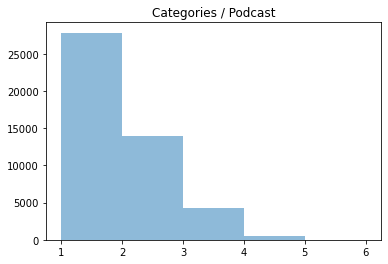

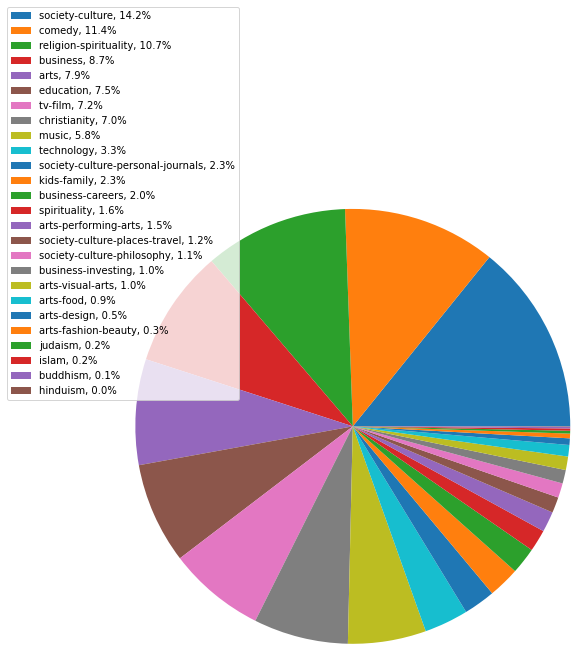

In [7]:
# Vizualizáció

# Kategória / Podcast
plt.hist(third.cat_num, 5, alpha=0.5)
plt.title('Categories / Podcast')
plt.show()

# Kategória eloszlás kör diagramként
plt.pie(fifth['sum'], radius = 2.5)
plt.legend(labels=['%s, %1.1f%%' % ( l, (float(s) / sum(fifth['sum'])) * 100) for l, 
                   s in zip(fifth['category'], fifth['sum'])], prop={'size': 10},
    bbox_to_anchor=(0, 0.6))
plt.show()

In [8]:
# 1.2. PODCASTS
# Ez a tábla tartalmaz minden információt egy Podcast csatornáról.
# [ podcast azonosító, itunes azonosító, slug, itunes url, cím ] 

podcasts.info()
podcasts.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46659 entries, 0 to 46658
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   podcast_id  46659 non-null  object
 1   itunes_id   46659 non-null  int64 
 2   slug        46659 non-null  object
 3   itunes_url  46659 non-null  object
 4   title       46659 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


,podcast_id,itunes_id,slug,itunes_url,title
0,a00018b54eb342567c94dacfb2a3e504,1313466221,scaling-global,https://podcasts.apple.com/us/podcast/scaling-...,Scaling Global
1,a00043d34e734b09246d17dc5d56f63c,158973461,cornerstone-baptist-church-of-orlando,https://podcasts.apple.com/us/podcast/cornerst...,Cornerstone Baptist Church of Orlando
2,a0004b1ef445af9dc84dad1e7821b1e3,139076942,mystery-dancing-in-the-dark,https://podcasts.apple.com/us/podcast/mystery-...,Mystery: Dancing in the Dark
3,a00071f9aaae9ac725c3a586701abf4d,1332508972,kts-money-matters,https://podcasts.apple.com/us/podcast/kts-mone...,KTs Money Matters
4,a000aa69852b276565c4f5eb9cdd999b,1342447811,speedway-soccer,https://podcasts.apple.com/us/podcast/speedway...,Speedway Soccer


In [9]:
# Tisztítás

podcasts.isnull().sum()

podcast_id    0
itunes_id     0
slug          0
itunes_url    0
title         0
dtype: int64

In [10]:
# Vizualizáció
# Mivel itt Podcast csatorna adatok szerepelnek és minden érték egyedi, nem nagyon lehet vizualizálni...
# Érdekes lehet a csatornák száma, amit a sorok számával lekérdezhetünk:

podcasts.shape

(46659, 5)

In [11]:
# 1.3. REVIEWS
# A legnagyobb adathalmaz, ami egy millió (1.148.214) szöveges visszajelzést, reakciót tárol.
# A podcast azonosítóhoz hozzá lett rendelve a reakció címe, tartalma, 5 csillagos értékelése és létrehozásának ideje.

reviews.info()
reviews.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1148214 entries, 0 to 1148213
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   podcast_id  1148214 non-null  object
 1   title       1148214 non-null  object
 2   content     1148214 non-null  object
 3   rating      1148214 non-null  int64 
 4   created_at  1148214 non-null  object
dtypes: int64(1), object(4)
memory usage: 43.8+ MB


,podcast_id,title,content,rating,created_at
0,c61aa81c9b929a66f0c1db6cbe5d8548,really interesting!,Thanks for providing these insights. Really e...,5,2018-04-24T12:05:16-07:00
1,c61aa81c9b929a66f0c1db6cbe5d8548,Must listen for anyone interested in the arts!!!,Super excited to see this podcast grow. So man...,5,2018-05-09T18:14:32-07:00
2,ad4f2bf69c72b8db75978423c25f379e,nauseatingly left,"I'm a liberal myself, but its pretty obvious a...",1,2019-06-11T14:53:39-07:00
3,ad4f2bf69c72b8db75978423c25f379e,Diverse stories,I find Tedx talks very inspirational but I oft...,5,2018-05-31T13:08:09-07:00
4,ad4f2bf69c72b8db75978423c25f379e,👍👍👍👍,"I love this podcast, it is so good.",5,2019-06-19T13:56:05-07:00


In [12]:
# Tisztítás

reviews.isnull().sum()

podcast_id    0
title         0
content       0
rating        0
created_at    0
dtype: int64

In [13]:
# Vizualizáció

# Szöveges vizualizációról majd a későbbiekben, ahhoz még kellenek adat előkészítési folyamatok.
# A különböző csillagos értékelések eloszlása?
#first = pd.read_sql("select rating, count(*) as num from reviews group by rating order by rating desc",connection)
#first 

# Hány darab 5 csillagos csatorna van?
#second = pd.read_sql("select count(atlag) as five_stars from (select podcast_id, avg(rating) as atlag from reviews group by podcast_id) where atlag = 5",connection)
#second

# Hány darab 1 csillagos csatorna van?
#third = pd.read_sql("select count(atlag) as one_stars from (select podcast_id, avg(rating) as atlag from reviews group by podcast_id) where atlag = 1",connection)
#third

# Az átlagos értékelés?
#fourth = pd.read_sql("select avg(rating) from reviews",connection)
#fourth

# Legelső illetve legutolsó visszajelzés / időintervallum ?
#fifth = pd.read_sql("select created_at from reviews order by created_at desc",connection)
#fifth

# Évenkénti átlagos értékelések
sixth = pd.read_sql("select date, avg(rating) as atlag from (select rating, substr(created_at,1,4) as date from reviews order by created_at desc) group by date",connection)
sixth

,date,atlag
0,2005,4.826733
1,2006,4.606107
2,2007,4.534620
3,2008,4.614268
4,2009,4.577128
5,2010,4.589996
6,2011,4.624287
7,2012,4.707614
8,2013,4.719394
9,2014,4.793543


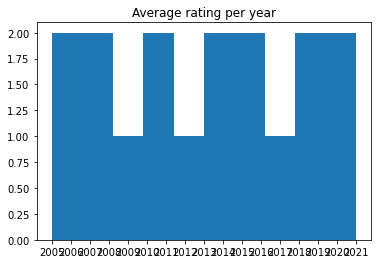

In [14]:
# Vizualizáció

# Éves átlag értékelések
plt.hist(sixth.date)
plt.title('Average rating per year')
plt.show()

In [15]:
# 1.4. RUNS
# Megmutatja, hogy mikor lettek az adott visszajelzések lekérdezve és hány darabot adtak hozzá.

runs.info()
runs.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   run_at         8 non-null      object
 1   max_rowid      8 non-null      int64 
 2   reviews_added  8 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


,run_at,max_rowid,reviews_added
0,2020-06-19 20:21:26,2728336,1010378
1,2020-07-02 01:52:36,2752398,8812
2,2020-08-17 16:43:28,2839466,31929
3,2020-09-05 15:29:03,2875948,13809
4,2020-10-07 19:52:46,2933138,22147


In [16]:
# Tisztítás

runs.isnull().sum()

run_at           0
max_rowid        0
reviews_added    0
dtype: int64

In [17]:
# Vizualizáció

# Összesen mennyi reakció található?
first = pd.read_sql("select sum(reviews_added) from runs",connection)
first

,sum(reviews_added)
0,1148214


In [18]:
# 1.5 INTERDISZCIPLINÁRIS VIZUALIZÁCIÓK

# Egyes kategóriák átlagos értékelései csökkenő sorrendben.
first = pd.read_sql("select category, avg(rating), count(*) from reviews join categories using (podcast_id) group by 1 order by 2 desc", connection)
first

,category,avg(rating),count(*)
0,business-careers,4.890204,36823
1,hinduism,4.881657,169
2,business,4.842532,125086
3,spirituality,4.839102,21958
4,arts-visual-arts,4.831926,11013
5,society-culture-philosophy,4.819674,19559
6,religion-spirituality,4.818130,84368
7,christianity,4.810930,52224
8,arts-design,4.810342,6633
9,education,4.808539,108184
